<a href="https://colab.research.google.com/github/pbnazrin/Angrytest/blob/master/Copy_of_Nazrin_P_B_TermWork_review_1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Here we import everything we need for the project

%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install Pillow
from PIL import Image
import pandas as pd
import cv2

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix
from sklearn.metrics import plot_confusion_matrix

print(tf.__version__)

2.4.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Data

In [4]:
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("/content/drive/MyDrive/Colab Notebooks/dataset2000", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)
print(imagepaths)
print(len(imagepaths)) # If > 0, then a PNG image was loaded
print(path)


['/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0002.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0005.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0001.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0004.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0006.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0007.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0003.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0018.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0012.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0015.png', '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0020.png', '/content/drive/MyDrive/Colab Notebooks/da

# Plotting the image

In [5]:
#plots the image into the notebook

def plot_image(path):
  img = np.array(Image.open(path).convert("RGB"))
  print(img.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640, 3)


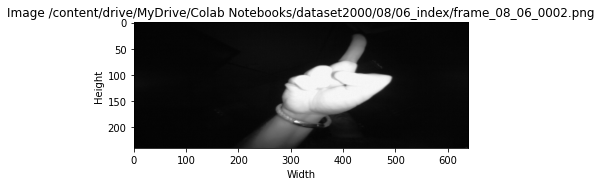

In [6]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

# Image Processing

Images have to be prepared to train the algorithm. We have to load all the images into an array that we will call X and all the labels into another array called y.

In [7]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
  img = np.array(Image.open(path).convert("RGB")) # Reads image and returns np.array
  img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
  X.append(img)
  # Processing label in image 
  category = path.split("/")[7]
  label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes  
  y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120,320, 3) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  2000
Labels loaded:  2000
6 /content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0002.png


Scipy's train_test_split allows us to split our data into a training set and a validate set. The training set will be used to build our model. Then, the validate data will be used to check if our predictions are correct.

In [8]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [9]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

# Construction of Model

Conv2D layer performs a 2-D convolutional operation, can be basically interpreted as a mathematical operation to calculate weights inside the image.
It needs number of filters that the convolutional layer will learn.It is common practice to use powers of 2, starting with 32, 64, 128 and increasing to 256, 512, 1024, for example.
Another parameter required by the Conv2D layer is the kernel_size, a 2-tuple specifying the width and height of the 2D convolution window. The kernel_size must be an odd integer, with typical values of (1, 1) , (3, 3) , (5, 5) , (7, 7) .

 MaxPooling2D is used to reduce the spatial dimensions of the output volume.

  ReLU stands for rectified linear unit, and is a type of activation function. ReLU is the most commonly used activation function in neural networks, especially in CNNs.

In [126]:
# Construction of model
from tensorflow.keras.layers import BatchNormalization
#begins with its object: model = Sequential()
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [129]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to
              #minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

# Training the model

In [130]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model=model.fit(X_train, y_train, epochs=5, batch_size=20, verbose=2, validation_data=(X_val, y_val))

Epoch 1/5
53/53 - 94s - loss: 0.2462 - accuracy: 0.9400 - val_loss: 0.3930 - val_accuracy: 0.9222
Epoch 2/5
53/53 - 92s - loss: 0.0737 - accuracy: 0.9867 - val_loss: 0.2418 - val_accuracy: 0.9533
Epoch 3/5
53/53 - 93s - loss: 0.0376 - accuracy: 0.9895 - val_loss: 0.1181 - val_accuracy: 0.9800
Epoch 4/5
53/53 - 92s - loss: 0.0282 - accuracy: 0.9924 - val_loss: 0.1944 - val_accuracy: 0.9444
Epoch 5/5
53/53 - 92s - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0658 - val_accuracy: 0.9756


In [121]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 116, 316, 32)      2432      
_________________________________________________________________
batch_normalization_14 (Batc (None, 116, 316, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 58, 158, 32)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 58, 158, 32)       128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 156, 64)       18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 56, 156, 64)       256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 78, 64)       

# Testing the Model
Now that we have the model compiled and trained, we need to check if it's good. First, we run model.evaluate to test the accuracy. Then, we make predictions and plot the images as long with the predicted labels and true labels to check everything. With that, we can see how our algorithm is working.
Later, we produce a confusion matrix, which is a specific table layout that allows visualization of the performance of an algorithm.

Evaluating the model by testing accuracy


In [124]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

16/16 [==============================] - 10s 574ms/step - loss: 26.3150 - accuracy: 0.1153
Test accuracy: 11.00%


In [ ]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [56]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

(2, 3)

In [117]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
   # img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    #print(predicted_label)
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

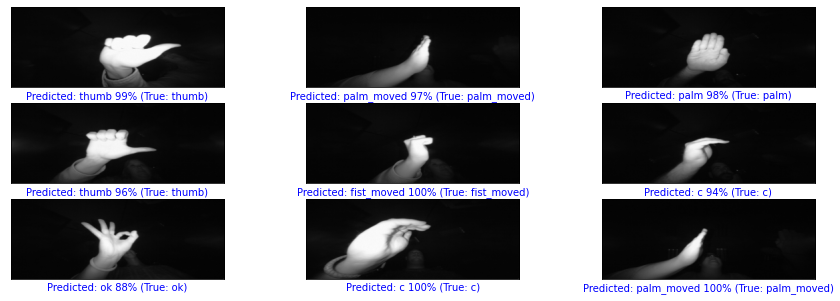

In [33]:
validate_9_images(predictions, y_test, X_test)

In [59]:


y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number


# Confusion Matrix

In [103]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    title = 'Normalized confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(16, 16))
    #ax.figure(figsize=(16,16))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax


np.set_printoptions(precision=2)




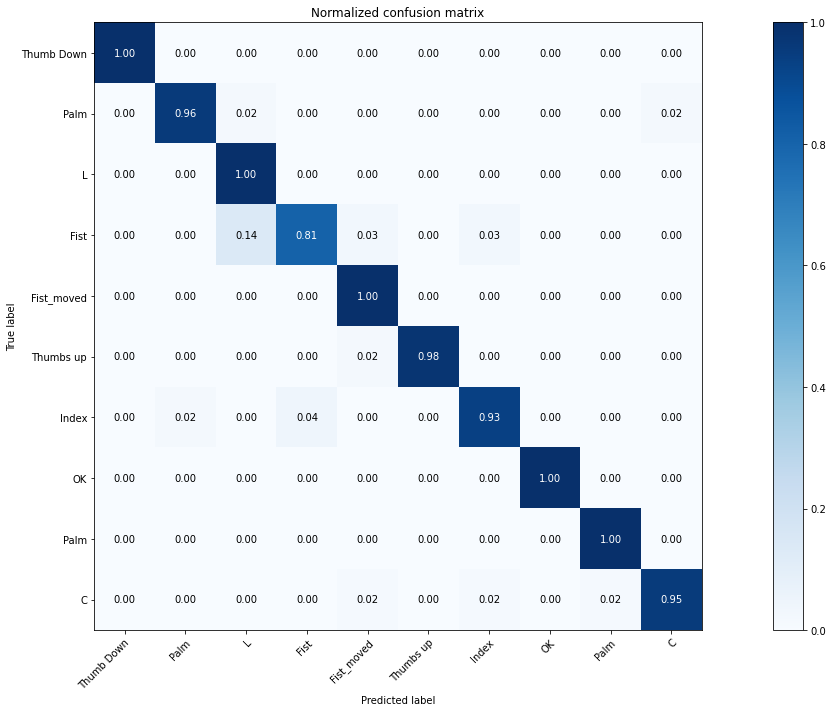

In [102]:

class_names=["Thumb Down", "Palm", "L", "Fist", "Fist_moved", "Thumbs up", "Index", "OK", "Palm", "C"]
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Normalized confusion matrix')

plt.show()


# Visualizing intermediate activations

Intermediate activations are useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we’ll use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the Sequential models, mapping the specified inputs to the specified outputs. What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential

Instantiating a model from an input tensor and a list of output tensors 


In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

When fed an image input, this model returns the values of the layer activations in the original model

With our model trained and stored, we can load a simple unseen image from our test set and see how it is classified:

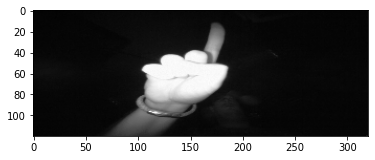

(1, 120, 320, 3)


In [ ]:
from keras.preprocessing import image
img_path = '/content/drive/MyDrive/Colab Notebooks/dataset2000/08/06_index/frame_08_06_0001.png'
img = image.load_img(img_path, target_size=(120,320))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
print(first_layer_activation.shape[2])

(1, 116, 316, 32)
316


 It’s a 116 × 316 feature map with 32 channels. Let’s try plotting the fourth channel of the activation of the first layer of the original model

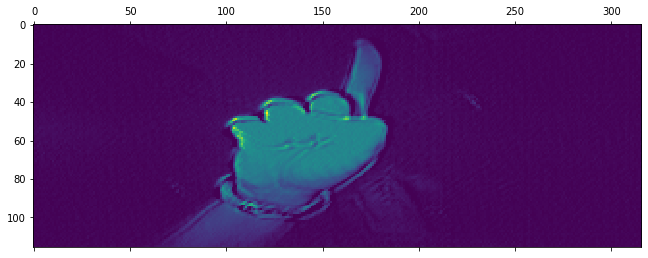

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Visualizing every channel in every intermediate activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


IndexError: ignored

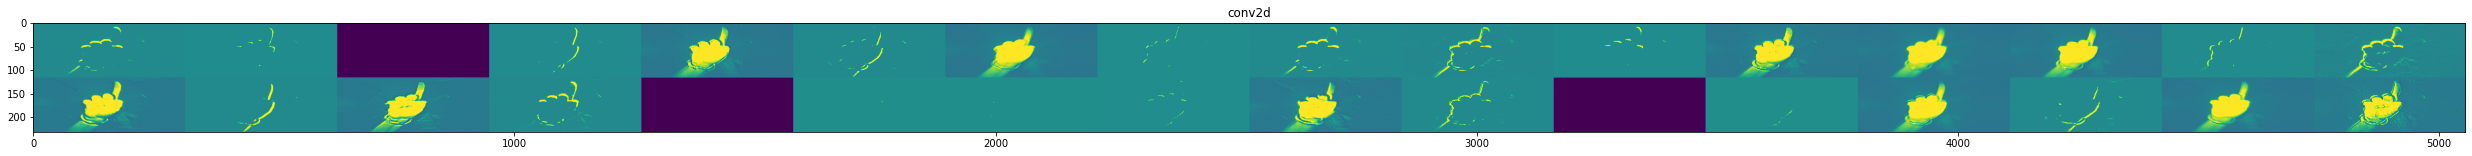

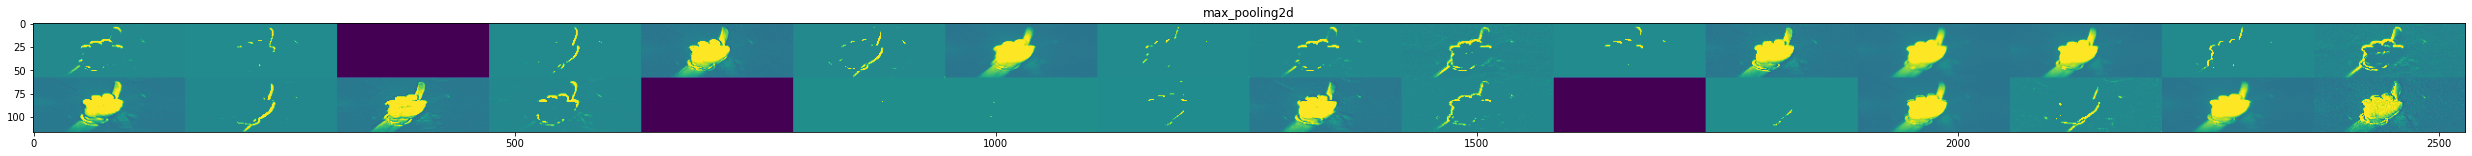

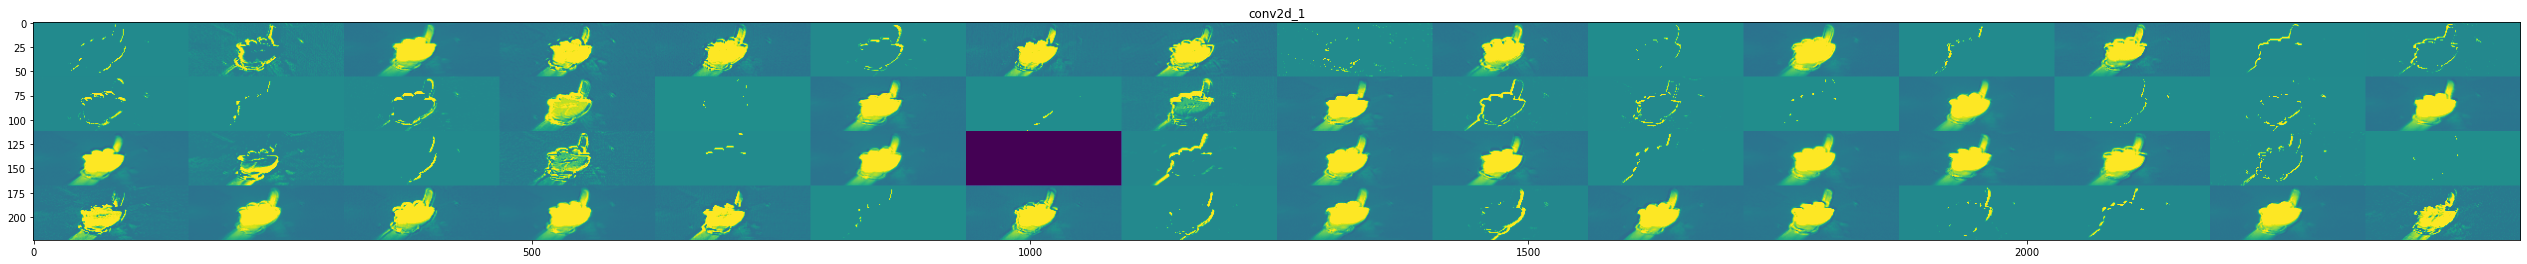

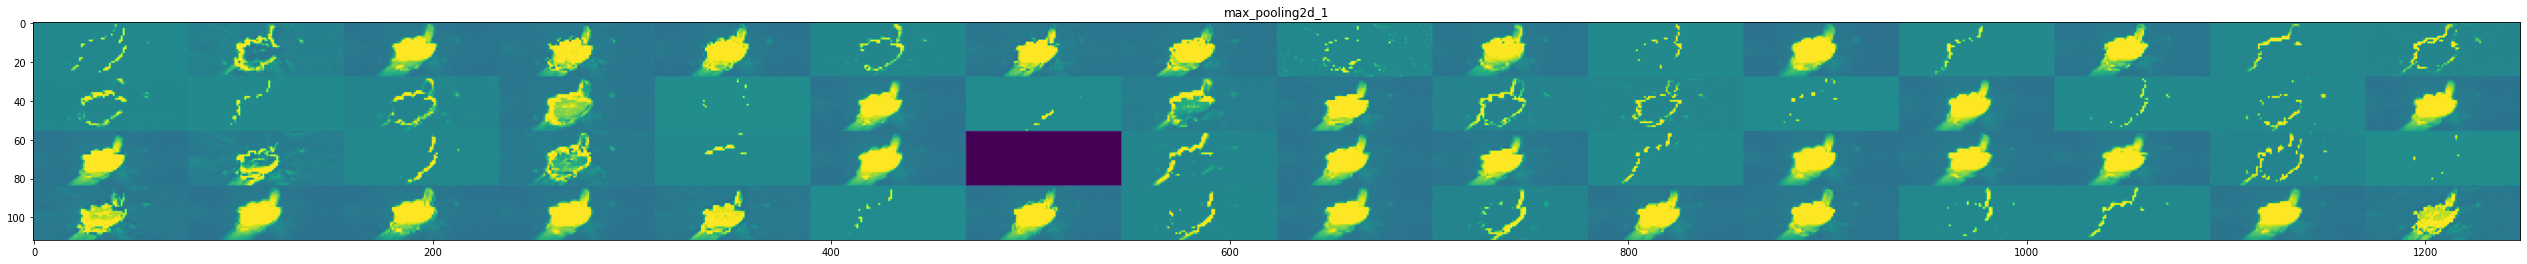

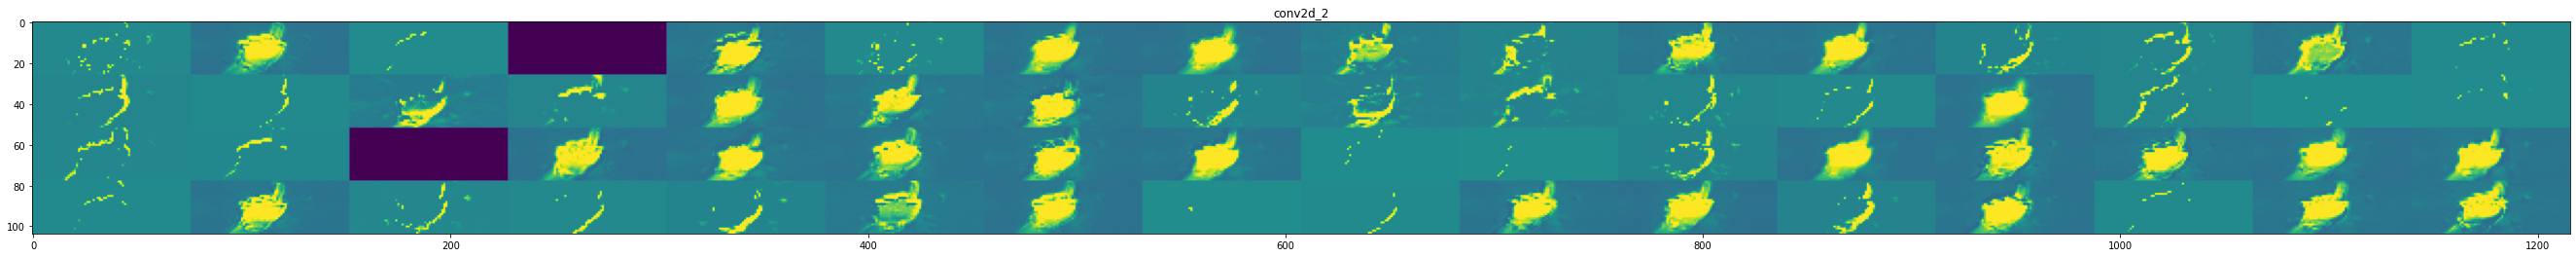

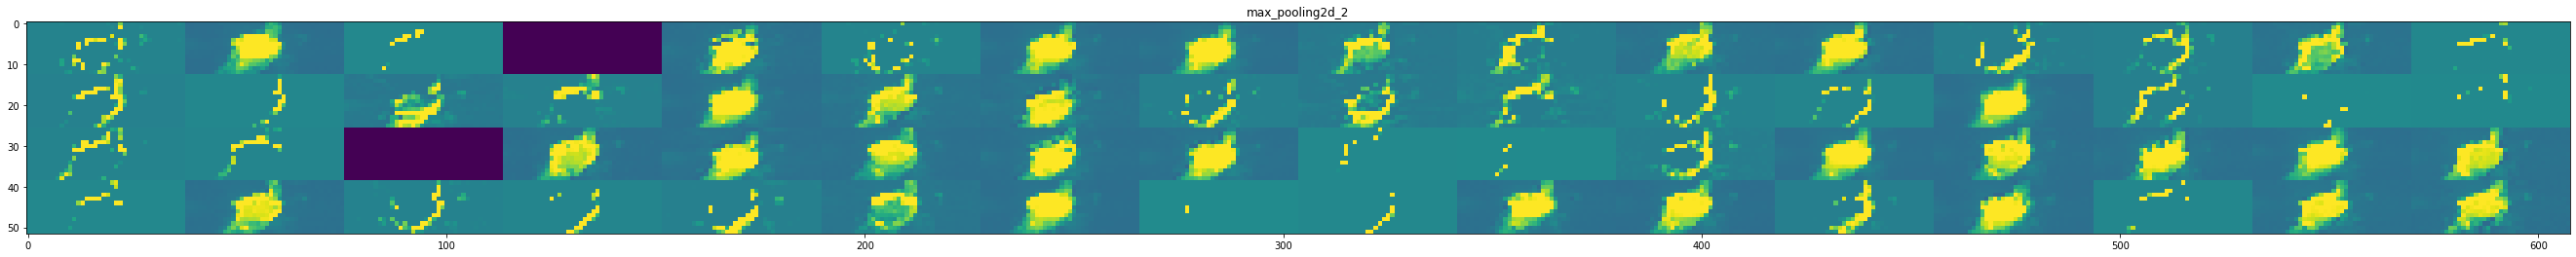

In [ ]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    size1 = layer_activation.shape[-2] #The feature map has shape (1, size, size, n_features).

    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix

    display_grid = np.zeros((size * n_cols, images_per_row * size1))

    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size1 : (row + 1) * size1] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Inerpretation of Hand pattern
The first layer is arguably retaining the full shape of the handpattern, although there are several filters that are not activated and are left blank. At that stage, the activations retain almost all of the information present in the initial picture.
As we go deeper in the layers, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as single borders, corners and angles. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.